In [1]:
import sys
sys.path.append('/usr/local/lib/wingpro10')
sys.path.append('/home/yeison/Development/PythonDev/DunderLab/python-chaski')
import wingdbstub

wingdbstub.Ensure()

In [2]:
import sys
import time
import asyncio
from datetime import datetime
from chaski.node import ChaskiNode
from itertools import product
import logging 
from names_generator import generate_name
import networkx as nx
import matplotlib.pyplot as plt
import random
from string import ascii_uppercase
# logging.basicConfig(level=logging.DEBUG)

In [3]:
# host = '::1'  # IPV6
host = '127.0.0.1'  # IPV4

topics = list(ascii_uppercase[:3])
nodes = []
i = 0

def graph(nodes):
    G = nx.Graph()        # if message.data['remove_original']:
        # for client in self.client_pairs:
        # self.close_connection(client)
    
    nodes_ = []
    for node in nodes:
        nodes_.append({'name': node.name, 'server_pairs': {v.name:0 for v in node.server_pairs}})
    
    for node in nodes_:
        for neighbor, latency in node["server_pairs"].items():
            G.add_edge(node["name"], neighbor, weight=latency)
    
    # for edge in G.edges(data=True):
    #     print(edge)
    
    nx.draw(G, with_labels=True, node_color='skyblue', node_size=100)
    plt.show()

In [4]:
node1 = ChaskiNode(host, 65432+0, name='Node1', suscriptions=['A'])
await node1.start_udp_server()
asyncio.create_task(node1.start_server())
nodes.append(node1)
node2 = ChaskiNode(host, 65432+1, name='Node2', suscriptions=['B'])
await node2.start_udp_server()
asyncio.create_task(node2.start_server())
nodes.append(node2)

node3 = ChaskiNode(host, 65432+2, name='Node3', suscriptions=['C'])
await node3.start_udp_server()
asyncio.create_task(node3.start_server())
nodes.append(node3)

node4 = ChaskiNode(host, 65432+3, name='Node4', suscriptions=['A'])
await node4.start_udp_server()
asyncio.create_task(node4.start_server())
nodes.append(node4)

In [5]:
await node2.connect_to_peer(node1)
await node3.connect_to_peer(node2)
await node4.connect_to_peer(node3)

In [7]:
await node2.request_forward(node1)
await node3.request_forward(node2)
await node4.request_forward(node3)

Node1: {'A'} [Node2: {'B'}: N( 2.9,  25.0), Node4: {'A'}: N( 3.8,  100.0)]
Node2: {'B'} [Node1: {'A'}: N( 2.7,  25.0), Node3: {'C'}: N( 2.5,  25.0)]
Node3: {'C'} [Node2: {'B'}: N( 2.3,  25.0)]
Node4: {'A'} [Node1: {'A'}: N( 2.8,  100.0)]


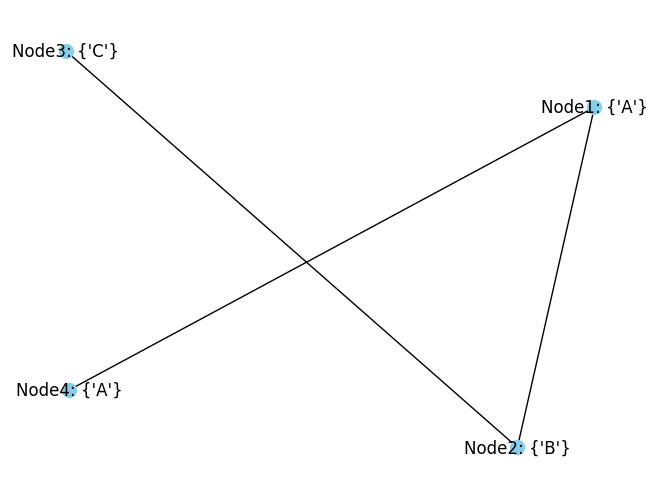

In [11]:
for node in nodes:
    print(node.name, node.server_pairs)

graph(nodes)

In [ ]:
node1